# Import all Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib notebook
import plotly.plotly as py
import plotly.graph_objs as go
from tqdm import tqdm

/home/putus/anaconda3/lib/python3.5/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Create the map Initial a base map of the world is created and then its cropped to get INDIA with longitude and lattitude values

<IPython.core.display.Javascript object>


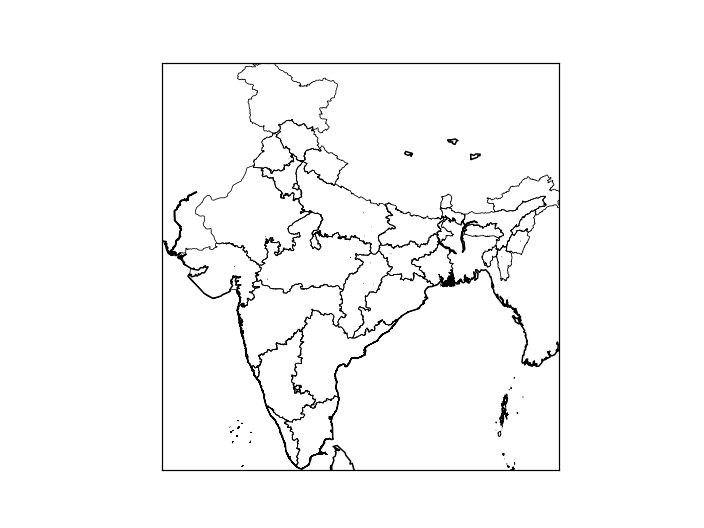

In [2]:
m = Basemap(llcrnrlon=67,llcrnrlat=8,urcrnrlon=97,urcrnrlat=37,projection='mill',resolution='l')
# Settting the borders of the coast line
m.drawcoastlines()

#Ignoring the border lines of nearby countries
m.drawcountries(linewidth=0)

#Creating the state borders using the INDIA sh file 
m.drawstates(linewidth=5)
m.readshapefile('./indiaShp/INDIA',name='states', drawbounds=True)

# The look and feel of the above created map with state names 
plt.show()
#print(stnames)

In [3]:
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['ST_NAME'])

# Import Datsets and Visualize

In [30]:
df1 = pd.read_csv("./datasets/dstrIPC_1.csv")
df2 = pd.read_csv("./datasets/dstrIPC_2013.csv")

In [6]:
df1.head(5)

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION        ...         ARSON  \
0          50                      46        ...            30   
1          23                      53        ...            69   
2          27                      59        ...            38   
3          20                      25        ...            23   
4          23                      49        ...            41   

   HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                1131            16   
1                1543             7   
2                2088            14   
3                 795            17   
4                1244            12   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  
2              1262              5818  
3              1181              3140  
4              2313              6507  

[5 rows x 33 columns]

In [7]:
df2.head(5)

STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  Andhra Pradesh   ADILABAD  2013      96                 72   
1  Andhra Pradesh  ANANTAPUR  2013     156                149   
2  Andhra Pradesh   CHITTOOR  2013      72                 61   
3  Andhra Pradesh   CUDDAPAH  2013      93                107   
4  Andhra Pradesh  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION        ...         ARSON  \
0          61                      65        ...            30   
1          28                     110        ...            29   
2          31                      52        ...            18   
3          19                      84        ...            34   
4         138                     192        ...            40   

   HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                2394            12   
1                2537            23   
2                 937            13   
3                2310             9   
4                4284            43   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                197     
1                                                337     
2                                                119     
3                                                318     
4                                                350     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                         138                                  464   
1                          43                                  161   
2                          84                                  435   
3                         163                                  207   
4                         338                                 1526   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          376   
1                                            0                          573   
2                                            0                          546   
3                                            0                          464   
4                                            0                         1104   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1390              6381  
1              1634              6913  
2              2239              5610  
3              1741              7048  
4              3139             19992  

[5 rows x 33 columns]

In [9]:
# Columns of Dataframes

In [10]:
df1.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [11]:
df2.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [12]:
def chngLower(df):
    tmp = []
    v   = df.columns
    v   = np.array(v)
    for i in range(len(v)):
        v[i]=v[i].lower()
    v[0] = 'state_ut'
    df.columns = v
    UpSt = df.state_ut.unique()
    loSt = [i.lower() for i in UpSt]
    maping={}
    for i in range(len(UpSt)):
        maping[UpSt[i]] = loSt[i] 
    df['state_ut'] = df['state_ut'].map(maping)
    return df

# Merge the two Dataset

In [48]:
df1 = chngLower(df1)
df2 = chngLower(df2)

In [49]:
df1.state_ut.unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal',
       'a & n islands', 'chandigarh', 'd & n haveli', 'daman & diu',
       'delhi ut', 'lakshadweep', 'puducherry'], dtype=object)

In [50]:
df2.state_ut.unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal',
       'a&n islands', 'chandigarh', 'd&n haveli', 'daman & diu',
       'delhi ut', 'lakshadweep', 'puducherry'], dtype=object)

In [51]:
data=pd.concat([df1,df2])

In [52]:
data.isnull().any()

state_ut                                               False
district                                               False
year                                                   False
murder                                                 False
attempt to murder                                      False
culpable homicide not amounting to murder              False
rape                                                   False
custodial rape                                         False
other rape                                             False
kidnapping & abduction                                 False
kidnapping and abduction of women and girls            False
kidnapping and abduction of others                     False
dacoity                                                False
preparation and assembly for dacoity                   False
robbery                                                False
burglary                                               False
theft                   

# Reduce

In [61]:
data_state_name = data.state_ut.unique()
data_state_name

array(['a & n islands', 'a&n islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'd & n haveli', 'd&n haveli', 'daman & diu', 'delhi ut', 'goa',
       'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir',
       'jharkhand', 'karnataka', 'kerala', 'lakshadweep', 'madhya pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal'], dtype=object)

In [57]:
data = data.sort_values(['state_ut'],ascending=[1])
data = data.reset_index(drop=True)

In [62]:
data.head(5)

state_ut district  year  murder  attempt to murder  \
0  a & n islands    TOTAL  2004      15                  1   
1  a & n islands    TOTAL  2002      17                  3   
2  a & n islands    TOTAL  2005      14                  3   
3  a & n islands  NICOBAR  2003       5                  0   
4  a & n islands  ANDAMAN  2003      16                  4   

   culpable homicide not amounting to murder  rape  custodial rape  \
0                                          2    10               0   
1                                          1     2               0   
2                                          3     4               0   
3                                          0     0               0   
4                                          1     2               0   

   other rape  kidnapping & abduction        ...         arson  \
0          10                       3        ...             9   
1           2                       2        ...             2   
2           4                       2        ...             6   
3           0                       0        ...             1   
4           2                       2        ...             7   

   hurt/grevious hurt  dowry deaths  \
0                 105             0   
1                  97             0   
2                  79             0   
3                   3             0   
4                 107             0   

   assault on women with intent to outrage her modesty  \
0                                                  6     
1                                                 17     
2                                                 11     
3                                                  0     
4                                                  9     

   insult to modesty of women  cruelty by husband or his relatives  \
0                           3                                    5   
1                           3                                    4   
2                           1                                    5   
3                           0                                    0   
4                           2                                    7   

   importation of girls from foreign countries  causing death by negligence  \
0                                            0                            6   
1                                            0                            0   
2                                            0                            3   
3                                            0                            0   
4                                            0                            0   

   other ipc crimes  total ipc crimes  
0               387               748  
1               328               608  
2               362               682  
3                19                33  
4               299               611  

[5 rows x 33 columns]

In [98]:
states=[]
for i in data_state_name:
    x  = data[data['state_ut']==i]
    x  = x.sort_values(['year','district'],ascending=[1,1])
    x1 = x[x['district']=='TOTAL']
    x2 = x[x['district']=='ZZ TOTAL']
    y  = pd.concat([x1,x2])
    y  = y.reset_index(drop=True)
    states.append(y)

In [99]:
len(states)

37

In [112]:
states[30]

state_ut  district  year  murder  attempt to murder  \
0   rajasthan     TOTAL  2001    1259               1923   
1   rajasthan     TOTAL  2002    1276               2043   
2   rajasthan     TOTAL  2003    1262               1977   
3   rajasthan     TOTAL  2004    1279               2030   
4   rajasthan     TOTAL  2005    1221               1920   
5   rajasthan     TOTAL  2006    1209               1694   
6   rajasthan     TOTAL  2007    1303               1772   
7   rajasthan     TOTAL  2008    1297               1649   
8   rajasthan     TOTAL  2009    1395               1673   
9   rajasthan     TOTAL  2010    1421               1557   
10  rajasthan     TOTAL  2011    1461               1566   
11  rajasthan     TOTAL  2012    1461               1538   
12  rajasthan  ZZ TOTAL  2013    1573               1662   

    culpable homicide not amounting to murder  rape  custodial rape  \
0                                          63  1049               0   
1                                          68  1051               0   
2                                          61  1050               0   
3                                          59  1038               0   
4                                          59   993               0   
5                                          79  1085               0   
6                                          64  1238               0   
7                                          54  1355               0   
8                                          80  1519               0   
9                                         104  1571               0   
10                                        100  1800               0   
11                                         98  2049               0   
12                                         86  3285               0   

    other rape  kidnapping & abduction        ...         arson  \
0         1049                    2718        ...          1092   
1         1051                    2587        ...          1130   
2         1050                    2238        ...           784   
3         1038                    2384        ...           835   
4          993                    1993        ...           648   
5         1085                    1970        ...           551   
6         1238                    2177        ...           675   
7         1355                    2358        ...           615   
8         1519                    2870        ...           556   
9         1571                    2985        ...           478   
10        1800                    3204        ...           473   
11        2049                    3243        ...           475   
12        3285                    4986        ...           484   

    hurt/grevious hurt  dowry deaths  \
0                27485           376   
1                26519           399   
2                26173           389   
3                25947           379   
4                22606           361   
5                21296           394   
6                19720           439   
7                21117           439   
8                21652           436   
9                19247           462   
10               17977           514   
11               17614           478   
12               18755           453   

    assault on women with intent to outrage her modesty  \
0                                                2878     
1                                                2730     
2                                                2715     
3                                                2825     
4                                                2503     
5                                                2582     
6                                                2477     
7                                                2520     
8                                                2485     
9                                                2339     
10                  